In [1]:
import os
import sys

# import tensorflow as tf
# from tensorflow import keras
# import keras.backend as K
import custom_loss_functions
import utils
# from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from numpy import expand_dims

# import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# import datetime
import csv
import pandas as pd
import json

# import argparse
from pathlib import Path

Using TensorFlow backend.


# Load trained model

In [2]:
model_path = "saved_models/MSE/21-02-2020_17:47:13/CAE_mvtec_b12.h5"

In [10]:
parent_dir = str(Path(model_path).parent)
val_dir = os.path.join(parent_dir, "val_results")
test_dir = os.path.join(parent_dir, "test_results")

In [12]:
imgs_val_input = np.load(os.path.join(val_dir, "imgs_val_input.npy"))
imgs_val_pred = np.load(os.path.join(val_dir, "imgs_val_pred.npy"))
imgs_val_diff = np.load(os.path.join(val_dir, "imgs_val_diff.npy"))

imgs_test_input = np.load(os.path.join(test_dir, "imgs_test_input.npy"))
imgs_test_pred = np.load(os.path.join(test_dir, "imgs_test_pred.npy"))
imgs_test_diff = np.load(os.path.join(test_dir, "imgs_test_diff.npy"))

In [13]:
imgs_val_input.shape

(21, 256, 256, 3)

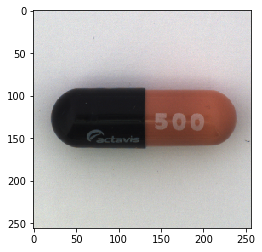

In [15]:
plt.imshow(imgs_val_input[0])

In [17]:
df_val = pd.read_pickle(os.path.join(val_dir, "df_val.pkl"))
df_test = pd.read_pickle(os.path.join(test_dir, "df_test.pkl"))

In [18]:
df_val

,filenames,mean,scores,std
0,good/000.png,0.704737,1.379270,0.261447
1,good/001.png,0.703825,1.367430,0.257211
2,good/002.png,0.704733,1.384040,0.263297
3,good/003.png,0.704933,1.383665,0.263075
4,good/004.png,0.704749,1.383182,0.262958
5,good/005.png,0.704694,1.382210,0.262603
6,good/006.png,0.705055,1.379122,0.261266
7,good/007.png,0.704913,1.381666,0.262307
8,good/008.png,0.704706,1.380917,0.262098
9,good/009.png,0.704638,1.381488,0.262345


In [19]:
df_test

,filenames,mean,scores,std
0,crack/000.png,0.704931,1.385435,0.263761
1,crack/001.png,0.704765,1.375607,0.260016
2,crack/002.png,0.705350,1.385447,0.263603
3,crack/003.png,0.704540,1.386619,0.264372
4,crack/004.png,0.705186,1.390051,0.265451
...,...,...,...,...
127,squeeze/015.png,0.704831,1.372342,0.258725
128,squeeze/016.png,0.704918,1.379461,0.261450
129,squeeze/017.png,0.705591,1.389095,0.264924
130,squeeze/018.png,0.704432,1.359907,0.254060
